img size :  (399, 600, 3)
scaled img size :  (199, 300, 3)


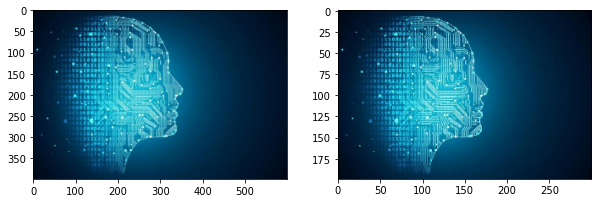

In [24]:
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

imgpath = "./images/ai_image.jpg"

img = cv2.imread(imgpath)
# scaledimg = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5)
h, w, ch = img.shape
print("img size : ", img.shape)
new_size=(int(w*0.5), int(h*0.5))
scaledimg = cv2.resize(img, dsize=new_size, fx=0.0, fy=0.0, interpolation=cv2.INTER_CUBIC)
print("scaled img size : ", scaledimg.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(121)
plt.imshow(img[..., ::-1])
plt.subplot(122)
plt.imshow(scaledimg[..., ::-1])
plt.show()

In [25]:
cv2.imshow("img", img)
cv2.imshow("scaledimg", scaledimg)
cv2.waitKey()

-1

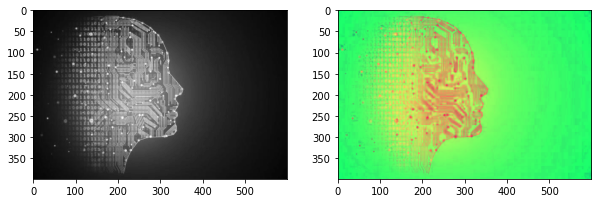

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.subplot(122)
plt.imshow(hsv[..., ::-1])
plt.show()

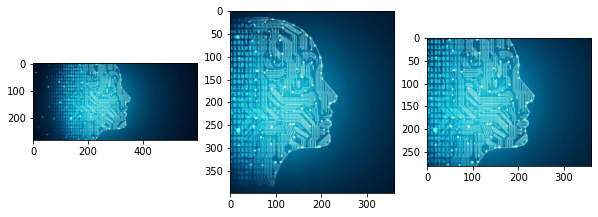

In [29]:
cropy = int(h*0.15)
cropw = int(w*0.20)
imgcropy = img[cropy:h-cropy, :, :]
imgcropx = img[:, cropw:w-cropw, :]
imgcropxy = img[cropy:h-cropy, cropw:w-cropw, :]

plt.subplot(131)
plt.imshow(imgcropy[..., ::-1])
plt.subplot(132)
plt.imshow(imgcropx[..., ::-1])
plt.subplot(133)
plt.imshow(imgcropxy[..., ::-1])
plt.show()

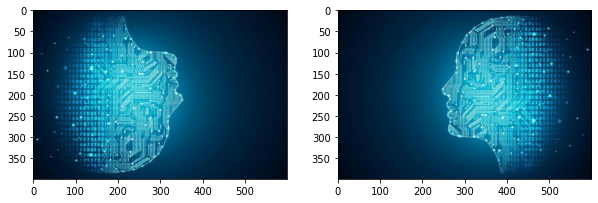

In [31]:
img_vflip = cv2.flip(img, 0)
img_hflip = cv2.flip(img, 1)

plt.subplot(121)
plt.imshow(img_vflip[..., ::-1])
plt.subplot(122)
plt.imshow(img_hflip[..., ::-1])
plt.show()

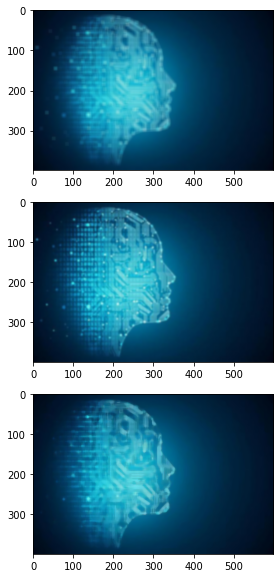

In [65]:
ksize=(9, 9)
ablur = cv2.blur(img, ksize)
gblur = cv2.GaussianBlur(img, ksize, 0)
mblur = cv2.medianBlur(img, ksize[0])

plt.subplot(311)
plt.imshow(ablur[..., ::-1])
plt.subplot(312)
plt.imshow(gblur[..., ::-1])
plt.subplot(313)
plt.imshow(mblur[..., ::-1])
plt.show()

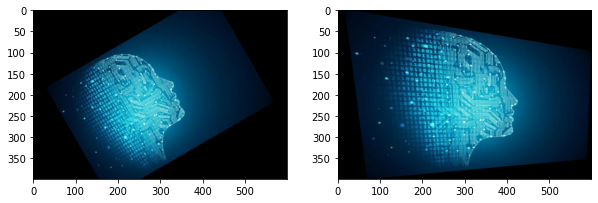

In [55]:
import numpy as np

center = (w//2, h//2)
angle = 30
scale = 0.75
dsize=(w, h)
rotmat = cv2.getRotationMatrix2D(center, angle, scale)
affine_dst = cv2.warpAffine(img, rotmat, dsize)

srcpts = np.array([[5, 5], [w-5, 5], [w-5, h-5], [5, h-5]], dtype=np.float32)
dstpts = np.array([[25, 5], [w-5, 100], [w-15, h-50], [75, h-5]], dtype=np.float32)
pmat = cv2.getPerspectiveTransform(srcpts, dstpts)
perspect_dst = cv2.warpPerspective(img, pmat, dsize)

plt.subplot(121)
plt.imshow(affine_dst[..., ::-1])
plt.subplot(122)
plt.imshow(perspect_dst[..., ::-1])
plt.show()
